In [1]:
# import the required libraries.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nanmedian
import random
from numpy import dot
from numpy.linalg import norm
from sklearn.model_selection import KFold
import math

In [2]:
 # reading the data
df = pd.read_csv("responses.csv") 

In [3]:
# fill the nan values using the medians
df = df.groupby(df.columns, axis=1).transform(lambda x: x.fillna(x.median()))

In [4]:
# used to find the nan count of attributes
def nancount(x):
    count = 0
    a = df[x].isnull()  # returns true for null values
    for val in a:
        if(val):
            count += 1
    return count

# dictinary to store the nan counts with keys as attribute names
counts = {}
for i in df.columns:
    returnval = nancount(i)
    if(returnval != 0):
        counts[i] = nancount(i)
print(counts)

{'Smoking': 8, 'Alcohol': 5, 'Punctuality': 2, 'Lying': 2, 'Achievements': 2, 'Gender': 6, 'Left - right handed': 3, 'Education': 1, 'Only child': 2, 'Village - town': 4, 'House - block of flats': 4}


In [5]:
def replace(col):
    # find the unique values
    un = pd.unique(df[col])
    j = 1
    # dictionary used to map the categorical variables
    dict_1 = {}
    for i in un[:-1]:
        dict_1[i] = j
        j += 1
    # un[-1] has nan in it. Hence that must have a value of zero initially
    dict_1[un[-1]] = 0
    # print(dict_1)
    x = []
    # list containing the integer values of the categorical variales
    for index, row in df[col].iteritems():
        x.append((dict_1[row]))
    med = np.median(x)
    # the zero valued rows are replaced with the median
    for i in range(0, len(x)):
        if(x[i] == 0):
            x[i] = int(med)
    # assign it to the dataframe
    df[col] = x
    
NaN_Col = ['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Education']
for i in NaN_Col:
    replace(i)

In [6]:
def nancount(x):
    count = 0
    a = df[x].isnull()
    for val in a:
        if(val):
            count += 1
    return count


counts = {}
for i in df.columns:
    returnval = nancount(i)
    if(returnval != 0):
        counts[i] = nancount(i)
print(counts)


{'Achievements': 2, 'Gender': 6, 'Left - right handed': 3, 'Only child': 2, 'Village - town': 4, 'House - block of flats': 4}


female    593
male      411
Name: Gender, dtype: int64
59.06374501992032 40.93625498007968


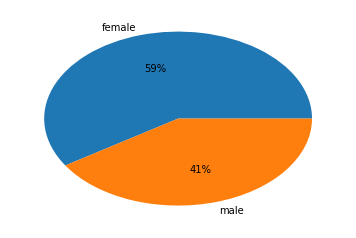

In [7]:
# total no.of attributes
valcount = df.Gender.value_counts()
print(valcount)
# find the percentage of the population who are male
noperc = (valcount['female'] / (valcount['male'] + valcount['female'])) * 100
# find the percentage of the population who are female
yesperc = (valcount['male'] / (valcount['male'] + valcount['female'])) * 100
print(noperc, yesperc)
# pie chart to represent the ratio
plt.pie(valcount, labels=['female', 'male'], autopct='%1.0f%%')
plt.show()


In [8]:
# dealing with missing values present in the Gender column
for index, row in df.Gender.iteritems():
    if(isinstance(row, float)):
        # generate a random number
        x = random.randint(1, 100)
        # based on the ratio classify the missing values
        if (x >= 1 and x <= 60):
            df.Gender.loc[index] = 'female'
        else:
            df.Gender.loc[index] = 'male'


C:\Users\5570\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


89.97020854021847 10.02979145978153


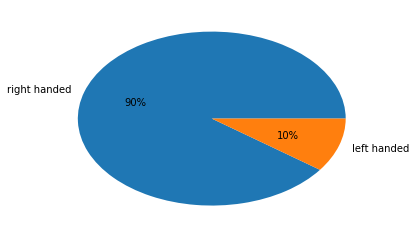

In [9]:
# similar way to handle the missing value for the column 'Left-right handed'
valcount = df['Left - right handed'].value_counts()
noperc = (valcount['right handed'] /
          (valcount['right handed'] + valcount['left handed'])) * 100
yesperc = (valcount['left handed'] /
           (valcount['right handed'] + valcount['left handed'])) * 100
print(noperc, yesperc)

plt.pie(valcount, labels=['right handed', 'left handed'], autopct='%1.0f%%')
plt.show()


In [10]:
for index, row in df['Left - right handed'].iteritems():
    if(isinstance(row, float)):
        x = random.randint(1, 100)
        if (x >= 1 and x <= 90):
            df['Left - right handed'].loc[index] = 'right handed'
        else:
            df['Left - right handed'].loc[index] = 'left handed'

C:\Users\5570\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


74.8015873015873 25.198412698412696


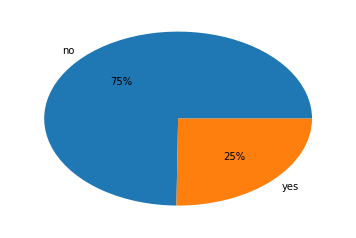

In [11]:
valcount = df['Only child'].value_counts()
noperc = (valcount['no'] / (valcount['yes'] + valcount['no'])) * 100
yesperc = (valcount['yes'] / (valcount['yes'] + valcount['no'])) * 100
print(noperc, yesperc)

plt.pie(valcount, labels=['no', 'yes'], autopct='%1.0f%%')
plt.show()


In [12]:
for index, row in df['Only child'].iteritems():
    if(isinstance(row, float)):
        x = random.randint(1, 100)
        if (x >= 1 and x <= 75):
            df['Only child'].loc[index] = 'no'
        else:
            df['Only child'].loc[index] = 'yes'


C:\Users\5570\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


29.721669980119287 70.27833001988071


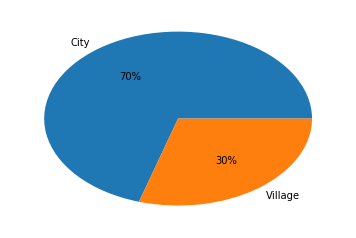

In [13]:
# similar way to handle the missing value for the column 'Village-Town'
valcount = df['Village - town'].value_counts()
noperc = (valcount['village'] / (valcount['village'] + valcount['city'])) * 100
yesperc = (valcount['city'] / (valcount['village'] + valcount['city'])) * 100
print(noperc, yesperc)
plt.pie(valcount, labels=['City', 'Village'], autopct='%1.0f%%')
plt.show()


In [14]:
for index,row in df['Village - town'].iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=70):
            df['Village - town'].loc[index]='city'
        else:
            df['Village - town'].loc[index]='village'

C:\Users\5570\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


40.85487077534791 59.14512922465208


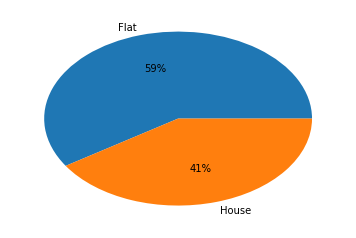

In [15]:
# similar way to handle the missing value for the column 'House - block of flats'
valcount = df['House - block of flats'].value_counts()
noperc = (valcount['house/bungalow'] /
          (valcount['house/bungalow'] + valcount['block of flats'])) * 100
yesperc = (valcount['block of flats'] /
           (valcount['house/bungalow'] + valcount['block of flats'])) * 100
print(noperc, yesperc)

plt.pie(valcount, labels=['Flat', 'House'], autopct='%1.0f%%')
plt.show()



In [16]:
for index, row in df['House - block of flats'].iteritems():
    if(isinstance(row, float)):
        x = random.randint(1, 100)
        if (x >= 1 and x <= 60):
            df['House - block of flats'].loc[index] = 'block of flats'
        else:
            df['House - block of flats'].loc[index] = 'house/bungalow'


C:\Users\5570\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
# Printing the nan counts
def nancount(x):
    count = 0
    a = df[x].isnull()
    for val in a:
        if(val):
            count += 1
    return count


counts = {}
for i in df.columns:
    returnval = nancount(i)
    if(returnval != 0):
        counts[i] = nancount(i)
print(counts)


{'Achievements': 2}


In [18]:
# replacing 1 and 2 for binary variables
def replace1(col):
    un=pd.unique(df[col])#find the unique values
    j=1
    dict_1={}# dictionary to assign numbers to each unique value
    for i in un:
        dict_1[i]=j
        j+=1  
    x=[]
    #store the encoded categorical data
    for index,row in df[col].iteritems():
        x.append((dict_1[row])) 
    df[col]=x
    
NaN_Col = [
    'Gender',
    'Left - right handed',
    'Only child',
    'Village - town',
    'House - block of flats',
    'Internet usage']
for i in NaN_Col:
    replace1(i)

In [19]:
# replace nan values of achievements column with its median
med1=np.nanmedian(df.Achievements)
for index,row in df.Achievements.iteritems():
    a=df.Achievements.isnull()
    for val in a:
        if(val == True):
            df.Achievements.loc[index]=med1           

C:\Users\5570\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
#printing the final nan counts
def nancount(x):
    count=0
    a=df[x].isnull()
    for val in a:
        if(val == True):
            count+=1
    return count
    
counts={}
for i in df.columns:
    returnval=nancount(i)
    if(returnval!=0):
        counts[i]=nancount(i)
print(counts)

{}


C:\Users\5570\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\5570\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


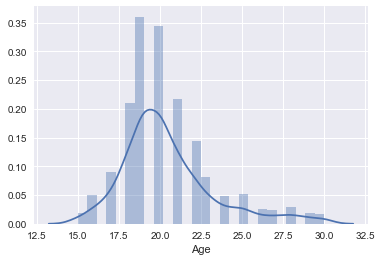

In [21]:
# histogram of age
sns.set(color_codes=True)
sns.distplot(df.Age)
plt.show()


C:\Users\5570\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\5570\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


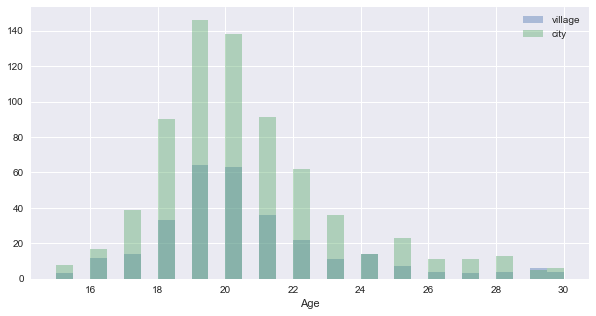

In [22]:
# Histogram of age grouped by place of stay
fig, ax = plt.subplots(figsize=(10, 5))

var_of_int_ser = df['Village - town']
sns.distplot(df[var_of_int_ser == 1].Age.dropna(),
             label='village', ax=ax, kde=False, bins=30)

sns.distplot(df[var_of_int_ser == 2].Age.dropna(),
             label='city', ax=ax, kde=False, bins=30)
ax.legend()


C:\Users\5570\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\5570\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


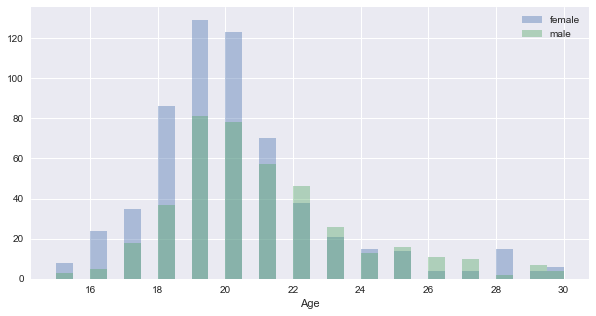

In [23]:
# histogram of age grouped by gender
fig, ax = plt.subplots(figsize=(10, 5))

var_of_int_ser = df['Gender']
sns.distplot(df[var_of_int_ser == 1].Age.dropna(),
             label='female', ax=ax, kde=False, bins=30)

sns.distplot(df[var_of_int_ser == 2].Age.dropna(),
             label='male', ax=ax, kde=False, bins=30)
ax.legend()

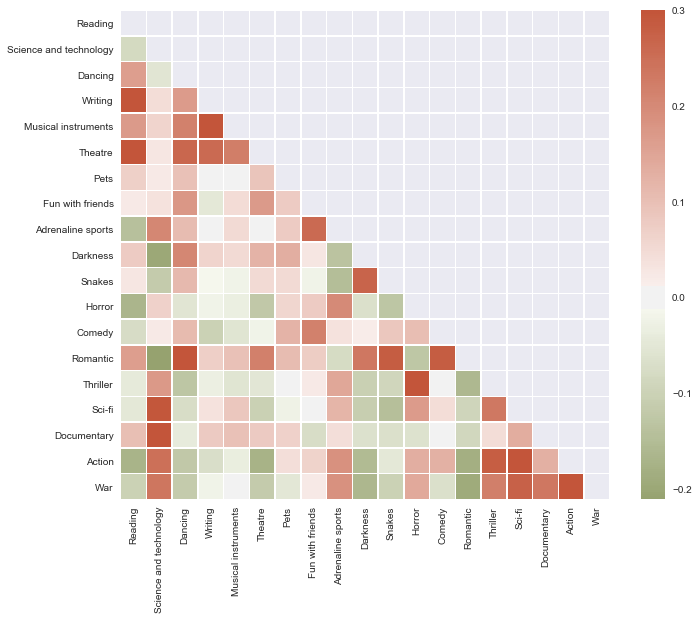

In [24]:
# selecting the important variables for hobbies and interests in data and
# plotting a correlation grid
data = [
    'Reading',
    'Science and technology',
    'Dancing',
    'Writing',
    'Musical instruments',
    'Theatre',
    'Pets',
    'Fun with friends',
    'Adrenaline sports',
    'Darkness',
    'Snakes',
    'Horror',
    'Comedy',
    'Romantic',
    'Thriller',
    'Sci-fi',
    'Documentary',
    'Action',
    'War']
corr = df[data].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5)


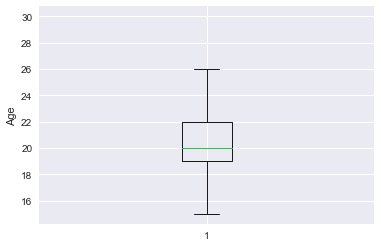

In [25]:
# boxplot of Age (since the outliers aren't way out of bound, cleaning it
# is not needed)
plt.boxplot(df['Age'])
plt.ylabel('Age')
plt.show()

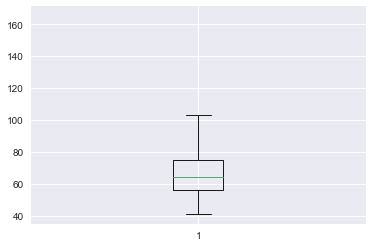

In [26]:
# boxplot of weight before cleaning
plt.boxplot(df.Weight)
plt.show()

C:\Users\5570\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


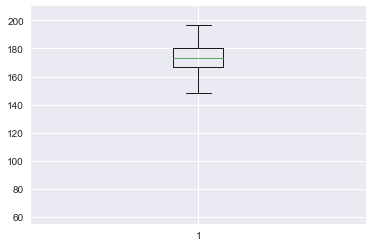

In [27]:
# converting pound to kg as outliers is in pound (kg does not make sense)
for index, row in df.Weight.iteritems():
    if(row >= 100):
        df.Weight.loc[index] = row * 0.454

# boxplot of height before cleaning
plt.boxplot(df.Height)
plt.show()

C:\Users\5570\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


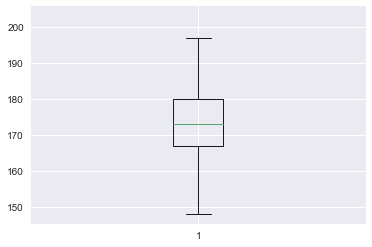

In [28]:
# converting inch to cm as 60cm is not possible for a human
for index, row in df.Height.iteritems():
    if(row <= 130):
        df.Height.loc[index] = row * 2.54

# plot of height after replacing outliers
plt.boxplot(df.Height)
plt.show()

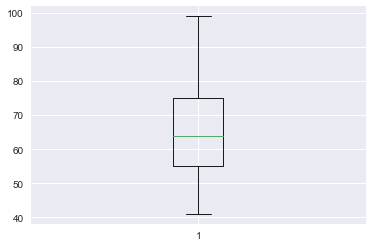

In [29]:
# plot of weight after replacing outliers
plt.boxplot(df.Weight)
plt.show()


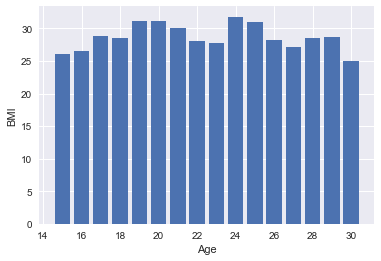

In [30]:
# calculating bmi
df['BMI'] = round(df['Weight'] / ((df['Height'] / 100)**2), 1)

# plot for BMI vs Age
plt.bar(df['Age'], df['BMI'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


5.0
4.732673267326732


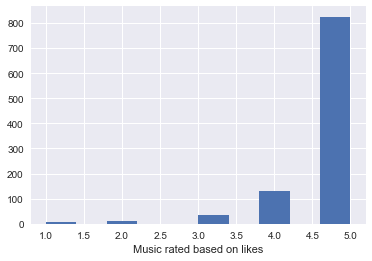

In [31]:
# histogram, median, mean for Music
plt.hist(df.Music)
print(np.median(df.Music))
print(np.mean(df.Music))
plt.xlabel('Music rated based on likes')
plt.show()

5.0
4.6158415841584155


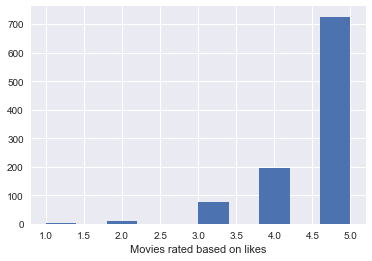

In [32]:
# histogram, median, mean for Movies
plt.hist(df.Movies)
print(np.median(df.Movies))
print(np.mean(df.Movies))
plt.xlabel('Movies rated based on likes')
plt.show()

In [33]:
# splitting into training and test data for PCA
y = df.Movies
y1 = df[df.columns[0:19]]
y2 = df[df.columns[20:150]]
X = pd.concat([y1, y2], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [34]:
# feature scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Applying PCA function on training
# and testing set of X component

pca = PCA(n_components=120)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

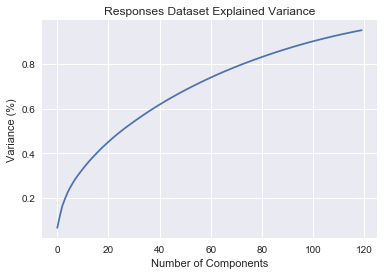

In [36]:
'''this is to check the variance chanes based on number of components. Since after 120, not much change is there, we choose
that as n_components in PCA'''
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('Responses Dataset Explained Variance')
plt.show()

         0  1
0        0  1
1        1  1
2        2  1
3        3  1
4        4  1
5        5  1
6        6  1
7        7  1
8        8  1
9        9  1
10      10  1
11      11  1
12      12  0
13      13  1
14      14  1
15      15  1
16      16  1
17      17  1
18      18  1
19      19  1
20      20  1
21      21  0
22      22  1
23      23  1
24      24  1
25      25  1
26      26  1
27      27  1
28      28  1
29      29  1
...    ... ..
980    980  1
981    981  1
982    982  1
983    983  1
984    984  1
985    985  1
986    986  1
987    987  1
988    988  1
989    989  0
990    990  0
991    991  1
992    992  0
993    993  1
994    994  1
995    995  1
996    996  1
997    997  1
998    998  0
999    999  1
1000  1000  1
1001  1001  1
1002  1002  1
1003  1003  1
1004  1004  1
1005  1005  1
1006  1006  0
1007  1007  1
1008  1008  0
1009  1009  1

[1010 rows x 2 columns]


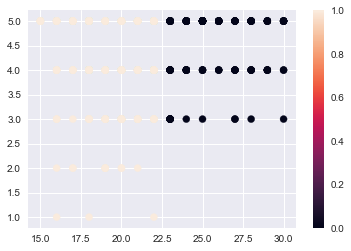

In [37]:
# Kmeans clustering for clustering based on Age

df_test = pd.DataFrame(columns=['Age', 'Movies'])
df_test['Age'] = df.Age
df_test['Movies'] = df.Movies
mat = df_test.values
# divide the data into 2 clusters
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(mat)
labels = kmeans.labels_
results = pd.DataFrame([df_test.index, labels]).T
print(results)
# plotting a scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_test['Age'], df_test['Movies'], c=results[1], s=50)
plt.colorbar(scatter)

In [38]:
# multiple linear regression

# regression on genre 'Comedy'
X = pd.DataFrame(np.c_[df.iloc[:, 31:73]])
y = df['Comedy']

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9)

lin_reg_mod = LinearRegression()

# fit the model
lin_reg_mod.fit(X_train, y_train)

# test the model
pred = lin_reg_mod.predict(X_test)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

# error rates
print("rmse", test_set_rmse)
print("r-squared", test_set_r2)


rmse 0.7677024984230189
r-squared 0.08716886647295063


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 883.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 883.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 883.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 29, cost: 866.0
Run 5, iteration: 2/100, moves: 0, cost: 866.0
Best run was number 5


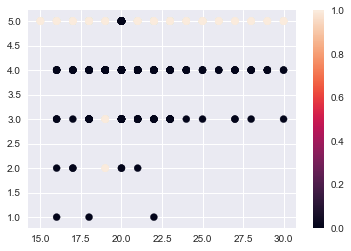

In [39]:
# kmodes clustering on Age
# divide the data into 2 clusters
data = pd.DataFrame({'Movies': df['Movies'], 'Age': df['Age']})

km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)
fig = plt.figure()
# plotting the scatter plot
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Age'], data['Movies'], c=clusters, s=50)
plt.colorbar(scatter)

In [40]:
# agglomerative clustering based on centroid distance
from kmodes.kmodes import KModes
# select the required columns
per = pd.DataFrame(np.c_[df.iloc[:,31:73]])
#kmodes clustering with initial cluster as 500
km = KModes(n_clusters=500,
            max_iter=1000,
            init='Huang',
            n_init=2,
            n_jobs=-1)

m1 = km.fit(per)
#print the cost of clustering 
m1.cost_

10285.0

In [41]:
# reduce the clusters gradually till the cost is minimized
mdl1 = m1.cluster_centroids_
km1 = KModes(n_clusters=250,
             max_iter=1000,
             init='Huang',
             n_init=2,
             n_jobs=-1)

m2 = km1.fit(mdl1)
#print(m2.cluster_centroids_)
m2.cost_

5055.0

In [42]:
mdl2 = m2.cluster_centroids_
km2 = KModes(n_clusters=125,
             max_iter=1000,
             init='Huang',
             n_init=2,
             n_jobs=-1)

m3= km2.fit(mdl2)
#print(m3.cluster_centroids_)
m3.cost_

2437.0

In [43]:
mdl3 = m3.cluster_centroids_
km3 = KModes(n_clusters=62,
             max_iter=1000,
             init='Huang',
             n_init=2,
             n_jobs=-1)

m4= km3.fit(mdl3)
#print(m4.cluster_centroids_)
m4.cost_

1125.0

In [44]:
mdl4 = m4.cluster_centroids_
km4 = KModes(n_clusters=31,
             max_iter=1000,
             init='Huang',
             n_init=2,
             n_jobs=-1)

m5 = km4.fit(mdl4)
#print(m5.cluster_centroids_)
m5.cost_

471.0

In [45]:
mdl5 = m5.cluster_centroids_
km5 = KModes(n_clusters=15,
             max_iter=1000,
             init='Huang',
             n_init=2,
             n_jobs=-1)

m6 = km5.fit(mdl5)
#print(m6.cluster_centroids_)
m6.cost_

201.0

In [46]:
mdl6 = m6.cluster_centroids_
km6 = KModes(n_clusters=10,
             max_iter=1000,
             init='Cao',
             n_init=2,
             n_jobs=-1)

m7 = km6.fit(mdl6)
#print(m7.cluster_centroids_)
m7.cost_

40.0

In [47]:
mdl7 = m7.cluster_centroids_
km7 = KModes(n_clusters=8,
             max_iter=1000,
             init='Cao',
             n_init=2,
             n_jobs=-1)

m8 = km7.fit(mdl7)
mfin_clust=m8.cluster_centroids_
print(m8.cost_)

20.0


In [48]:
# The min cost is obtained when number of clusters = 8
mfin=km7.fit_predict(per)
fin=pd.DataFrame(mfin)
print(mfin_clust)
print('Somebody who likes socializing, spends a lot of time on the internet. (Hence might go out often in a car.)')
print('In general, people who like learning foreign languages aren\'t afraid of public speaking.')
print('In general, people who are scared of dangerous dogs do not have pets.')
print('Youth in Slovakia do not prefer any trivial educational subjects like Mathematics, Biology, History, etc.')
print('In this new era of internet and youth addicted to it, extra hobbies and interest in studies is fading away.')


[[1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 5. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 2. 1. 1. 1. 4. 2. 2. 1. 1. 1. 1. 3. 1. 1. 1. 1. 2. 4. 1. 1. 1. 2. 3.
  1. 1. 3. 2. 3. 4. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 3. 2.]
 [2. 1. 1. 1. 1. 4. 2. 1. 2. 1. 1. 2. 3. 2. 1. 1. 1. 1. 3. 1. 1. 1. 2. 1.
  1. 1. 2. 3. 2. 4. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.]
 [3. 2. 3. 1. 1. 4. 1. 2. 1. 1. 1. 2. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 2. 3. 1. 4. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 2. 3. 4. 3. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 5. 1. 1. 1. 1. 1.
  1. 1. 1. 3. 2. 5. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1.]
 [2. 2. 1. 2. 2. 3. 2. 1. 1. 1. 2. 3. 1. 1. 1. 1. 1. 1. 4. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1.]
 [3. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 3. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1.
  1. 1. 2. 1. 2. 5. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 5. 3. 1. 1. 1. 1. 2. 1. 1. 1. 4. 1. 1. 2. 1. 1. 1. 5. 5.
  1. 2. 1

In [49]:
# select the required columns
df1=df.iloc[:,20:73]

# add a new column which has the final classification
df1['clusters']=mfin

# In order to find the similarity between the users, we group the users who belong to the same cluster
df_fin=df1.groupby(['clusters'])


In [50]:
fin_0=df_fin.get_group(0)

fin_1=df_fin.get_group(1)

fin_2=df_fin.get_group(2)

fin_3=df_fin.get_group(3)

fin_4=df_fin.get_group(4)

fin_5=df_fin.get_group(5)

fin_6=df_fin.get_group(6)

fin_7=df_fin.get_group(7)


In [51]:
#convert the centroids of a cluster into a list
mfin_clust=list(mfin_clust)

In [52]:
# create a new user
y=[]

# the preferences of the user is obtained by generating a random number between 1-5 for all the 42 columns
for i in range(0,42):
    x=random.randint(1,5)
    y.append(x)
    
# y is the list of user preferences
print(y)

[5, 2, 4, 3, 3, 5, 2, 2, 2, 4, 5, 1, 5, 3, 3, 4, 1, 1, 2, 4, 5, 2, 2, 2, 5, 3, 2, 5, 2, 5, 5, 5, 1, 3, 3, 2, 4, 5, 1, 4, 3, 2]


In [53]:
# Euclidian distance between y and the centroid of each cluster
# The calculated distances are stored in a dictionary with the key = cluster numbers
distance={}

for i in range(0,8):
    distance[i]=(math.sqrt(sum([(a - b) ** 2 for a, b in zip(mfin_clust[i], y)])))
    
# minimum distance is calculated using the values of the dictionary 
min_clust=min(distance, key=distance.get)

In [54]:
#the user is classified into the cluster
df_clust=df_fin.get_group(min_clust)

In [55]:
#similarity for y and df_clust
# drop the columns containing movie genre as the similarity between the users is calculated using the hobbies preferences
df_clust2=df_clust.drop(['Horror','Romantic','Comedy','Thriller','Sci-fi','War','Fantasy/Fairy tales','Western','Animated',
                         'Documentary','Action'],axis=1)

In [56]:
# insert a new column called index as each user needs to have one unique identity
ind=list(range(0,len(df_clust2)))
df_clust2.insert(0,'Index',ind)

In [57]:
# function to calculate the cosine similarity
def sim(a,b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

# add the index column to the dataframe
df_clust2['Index']

# dictinary to store the user-user similarity
xz_dict={}

for j in range(0,len(df_clust2)):
    xz=[]
    # the list contains the column header and the preferences of the jth row
    xz=list(df_clust2.iloc[j,:].items())
    xz1=[]    
    # append only the preferences in a new list
    for i in range(1,43):
        xz1.append(xz[i][1])       
    simi=sim(xz1,y)
    #store the user similarity in a dictionary
    xz_dict[j]=simi

In [58]:
# find 5 users who are most similar to the new user
top_5=sorted(xz_dict, key=xz_dict.get, reverse=True)[:5]

In [59]:
#dictionary used to store the rating for each genre based on user similarities
fin_rec={}

# for each genre
for k in range(1,12):
    user_rating=[]
    sum_sim=0
    rec=0    
    # apped the ratings of the similar users into a list for a particular genre
    for i in top_5:
        user_rating.append(df_clust.iloc[i,k:k+1].item())        
    # calculate the rating of the new user based on user-user similarity
    for i,j in zip(user_rating,xz_dict):
        rec=rec+(i*xz_dict[j])
        sum_sim=sum_sim+xz_dict[j]
    # store the rating in the dictionary created
    fin_rec[k]=rec/sum_sim
    
#select the top 3 genres based on rating
top_3=sorted(fin_rec, key=fin_rec.get, reverse=True)[:3]
# Thus recommend the genres to the user.

for l in top_3:
    print(df_clust.columns[l])

Comedy
Romantic
Sci-fi


In [60]:
def trainModelAndValidate(train, test):
    count = 0
    # select the required columns
    per = pd.DataFrame(np.c_[train.iloc[:, 31:73]])
    # kmodes clustering with initial cluster as 500
    km = KModes(n_clusters=500, max_iter=1000, init='Huang', n_init=2,
                n_jobs=-1)
    print("Cost of K clusters")
    m1 = km.fit(per)
    # print the cost of clustering
    print("500 clusters:", m1.cost_)

    # reduce the clusters gradually till the cost is minimized
    mdl1 = m1.cluster_centroids_
    km1 = KModes(
        n_clusters=250,
        max_iter=1000,
        init='Huang',
        n_init=2,
        n_jobs=-1)
    m2 = km1.fit(mdl1)
    # print(m2.cluster_centroids_)
    print("250 clusters:", m2.cost_)

    mdl2 = m2.cluster_centroids_
    km2 = KModes(
        n_clusters=125,
        max_iter=1000,
        init='Huang',
        n_init=2,
        n_jobs=-1)
    m3 = km2.fit(mdl2)
    # print(m3.cluster_centroids_)
    print("125 clusters:", m3.cost_)

    mdl3 = m3.cluster_centroids_
    km3 = KModes(
        n_clusters=62,
        max_iter=1000,
        init='Huang',
        n_init=2,
        n_jobs=-1)
    m4 = km3.fit(mdl3)
    # print(m4.cluster_centroids_)
    print("62 clusters:", m4.cost_)

    mdl4 = m4.cluster_centroids_
    km4 = KModes(
        n_clusters=31,
        max_iter=1000,
        init='Huang',
        n_init=2,
        n_jobs=-1)
    m5 = km4.fit(mdl4)
    # print(m5.cluster_centroids_)
    print("31 clusters:", m5.cost_)

    mdl5 = m5.cluster_centroids_
    km5 = KModes(
        n_clusters=15,
        max_iter=1000,
        init='Huang',
        n_init=2,
        n_jobs=-1)
    m6 = km5.fit(mdl5)
    # print(m6.cluster_centroids_)
    print("15 clusters:", m6.cost_)

    mdl6 = m6.cluster_centroids_
    km6 = KModes(
        n_clusters=10,
        max_iter=1000,
        init='Cao', 
        n_init=2, 
        n_jobs=-1)
    m7 = km6.fit(mdl6)
    # print(m7.cluster_centroids_)
    print("10 clusters:", m7.cost_)

    mdl7 = m7.cluster_centroids_
    km7 = KModes(
        n_clusters=8, 
        max_iter=1000, 
        init='Cao', 
        n_init=2, 
        n_jobs=-1)
    m8 = km7.fit(mdl7)
    mfin_clust = m8.cluster_centroids_
    print("8 clusters:", m8.cost_)
    print()

    # The min cost is obtained when number of clusters = 8
    mfin = km7.fit_predict(per)
    fin = pd.DataFrame(mfin)
    # print(mfin_clust)

    # select the required columns
    df1 = train.iloc[:, 20:73]
    # add a new column which has the final classification
    df1['clusters'] = mfin
    # In order to find the similarity between the users, we group the users
    # who belong to the same cluster
    df_fin = df1.groupby(['clusters'])

    fin_0 = df_fin.get_group(0)
    # print(np.std(fin_0['Horror']))

    fin_1 = df_fin.get_group(1)
    # print(np.std(fin_1['Horror']))

    fin_2 = df_fin.get_group(2)

    fin_3 = df_fin.get_group(3)

    fin_4 = df_fin.get_group(4)

    fin_5 = df_fin.get_group(5)

    fin_6 = df_fin.get_group(6)

    fin_7 = df_fin.get_group(7)

    # convert the centroids of a cluster into a list
    mfin_clust = list(mfin_clust)

    for i in range((test.shape[0])):
        row_hobby = list(df.iloc[i, 31:73])
        row_genre = list(df.iloc[i, 20:31])

        # Euclidian distance between y and the centroid of each cluster
        # The calculated distances are stored in a dictionary with the key =
        # cluster numbers
        distance = {}

        for i in range(0, 8):
            distance[i] = (math.sqrt(
                sum([(a - b) ** 2 for a, b in zip(mfin_clust[i], row_hobby)])))
        # minimum distance is calculated using the values of the dictionary
        min_clust = min(distance, key=distance.get)
        # the user is classified into the cluster
        df_clust = df_fin.get_group(min_clust)
        # similarity for y and df_clust
        # drop the columns containing movie genre as the similarity between the
        # users is calculated using the hobbies preferences
        df_clust2 = df_clust.drop(['Horror',
                                   'Romantic',
                                   'Comedy',
                                   'Thriller',
                                   'Sci-fi',
                                   'War',
                                   'Fantasy/Fairy tales',
                                   'Western',
                                   'Animated',
                                   'Documentary',
                                   'Action'],
                                  axis=1)
        # insert a new column called index as each user needs to have one
        # unique identity
        ind = list(range(0, len(df_clust2)))
        df_clust2.insert(0, 'Index', ind)

        # add the index column to the dataframe
        df_clust2['Index']
        # dictinary to store the user-user similarity
        xz_dict = {}
        for j in range(0, len(df_clust2)):
            xz = []
            # the list contains the column header and the preferences of the
            # jth row
            xz = list(df_clust2.iloc[j, :].items())
            # print(xz)
            xz1 = []
            # append only the preferences in a new list
            for i in range(1, 43):
                xz1.append(xz[i][1])
            # print(xz1)
            simi = sim(xz1, row_hobby)
            # store the user similarity in a dictionary
            xz_dict[j] = simi
        # find 5 users who are most similar to the new user
        top_5 = sorted(xz_dict, key=xz_dict.get, reverse=True)[:5]

        # dictionary used to store the rating for each genre based on user
        # similarities
        fin_rec = {}
        actual = {}
        # for each genre
        for k in range(1, 12):
            actual[k] = row_genre[k - 1]
            user_rating = []
            sum_sim = 0
            rec = 0
            # apped the ratings of the similar users into a list for a
            # particular genre
            for i in top_5:
                user_rating.append(df_clust.iloc[i, k:k + 1].item())
            # calculate the rating of the new user based on user-user
            # similarity
            for i, j in zip(user_rating, xz_dict):
                rec = rec + (i * xz_dict[j])
                sum_sim = sum_sim + xz_dict[j]
            # store the rating in the dictionary created
            fin_rec[k] = rec / sum_sim
        # select the top 3 genres based on rating
        top_3 = sorted(fin_rec, key=fin_rec.get, reverse=True)[:3]
        top_3_actual = sorted(actual, key=actual.get, reverse=True)[:3]
        # Thus recommend the genres to the user.
        for l in top_3:
            if l in top_3_actual:
                count += 1
    print("Accuracy", count / (3 * test.shape[0]))
    return count / (3 * test.shape[0])
kf = KFold(5, True, 1)
i=1
list_accuracy=[]
for train, test in kf.split(df):
    print("______________________________________________")
    print("Fold"+str(i))
    i+=1
    list_accuracy.append(trainModelAndValidate(df.iloc[train],df.iloc[test]))
print("______________________________________________")
print("Accuracy of the model is",(sum(list_accuracy)/len(list_accuracy))*100,"%")


______________________________________________
Fold1
Cost of K clusters
500 clusters: 6415.0
250 clusters: 5086.0
125 clusters: 2494.0
62 clusters: 1155.0
31 clusters: 508.0
15 clusters: 250.0
10 clusters: 35.0
8 clusters: 17.0

Accuracy 0.29372937293729373
______________________________________________
Fold2
Cost of K clusters
500 clusters: 6389.0
250 clusters: 5084.0
125 clusters: 2456.0
62 clusters: 1164.0
31 clusters: 506.0
15 clusters: 224.0
10 clusters: 46.0
8 clusters: 15.0

Accuracy 0.3234323432343234
______________________________________________
Fold3
Cost of K clusters
500 clusters: 6401.0
250 clusters: 5113.0
125 clusters: 2436.0
62 clusters: 1174.0
31 clusters: 498.0
15 clusters: 205.0
10 clusters: 41.0
8 clusters: 12.0

Accuracy 0.36303630363036304
______________________________________________
Fold4
Cost of K clusters
500 clusters: 6370.0
250 clusters: 5122.0
125 clusters: 2469.0
62 clusters: 1134.0
31 clusters: 498.0
15 clusters: 213.0
10 clusters: 50.0
8 clusters: 20.0